In [123]:
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing import Pool

In [86]:
def greedy(k, T):
    qstars = [np.random.normal() for i in range(k)]
    q_estimates = np.zeros(k) # Q(a) = 0 for a in range(k)
    counter = np.zeros(k) # N(a) = 0 for a in range(k)
    avg_reward = []

    for i in range(T):
        reward_options = [np.random.normal(loc=qstars[j]) for j in range(k)]
        action = np.argmax(reward_options) # A = argmax_a Q(a)
        # np.argmax is not good when there are two or more same values in the array,
        # but I ignore that case because it is unlikely to happen
        reward_this_time = reward_options[action] # R = bandit(A)
        counter[action] += 1 # N(A) = N(A) + 1
        q_estimates[action] += (reward_this_time - q_estimates[action]) / counter[action] # Q(A) = Q(A) + (R - Q(A)) / N(A)
        avg_reward.append(np.average(q_estimates))
    return avg_reward

In [92]:
def epsilon_greedy(k, T, epsilon):
    qstars = [np.random.normal() for i in range(k)]
    q_estimates = np.zeros(k) # Q(a) = 0 for a in range(k)
    counter = np.zeros(k) # N(a) = 0 for a in range(k)
    avg_reward = []

    for i in range(T):
        reward_options = [np.random.normal(loc=qstars[j]) for j in range(k)]
        rand = np.random.rand()
        if rand < epsilon:
            action = np.random.randint(k) # A = a random action
        else:
            action = np.argmax(reward_options) # A = argmax_a Q(a)
        reward_this_time = reward_options[action] # R = bandit(A)
        counter[action] += 1 # N(A) = N(A) + 1
        q_estimates[action] += (reward_this_time - q_estimates[action]) / counter[action] # Q(A) = Q(A) + (R - Q(A)) / N(A)
        avg_reward.append(np.average(q_estimates))
    return avg_reward

In [116]:
# avg_reward_greedy = []
# for i in range(n_iter):
#     p = multiprocessing.Process(target=greedy, args=(k, T))
#     p.start()
#     avg_reward_greedy.append(p)

In [122]:
# avg_reward_greedy = np.array(avg_reward_greedy)
# print(avg_reward_greedy)

[<Process name='Process-2' pid=689 parent=388 stopped exitcode=0>
 <Process name='Process-3' pid=690 parent=388 stopped exitcode=0>
 <Process name='Process-4' pid=691 parent=388 stopped exitcode=0> ...
 <Process name='Process-1999' pid=2686 parent=388 stopped exitcode=0>
 <Process name='Process-2000' pid=2687 parent=388 stopped exitcode=0>
 <Process name='Process-2001' pid=2688 parent=388 stopped exitcode=0>]


In [145]:
k = 10
T = 1000
n_iter = 1000
epsilons = [0.5, 0.1, 0.01]

In [146]:
avg_reward_greedy = np.array([greedy(k, T) for _i in range(n_iter)])

In [147]:
avg_rewards_epsilon_greedy = []
for epsilon in epsilons:
    avg_rewards_epsilon_greedy.append(np.array([epsilon_greedy(k, T, epsilon) for _j in range(n_iter)]))

In [148]:
avg_avg_reward_greedy = avg_reward_greedy.mean(axis=0)
avg_avg_rewards_epsilon_greedy = []
for i in range(len(epsilons)):
    avg_avg_rewards_epsilon_greedy.append(avg_rewards_epsilon_greedy[i].mean(axis=0))

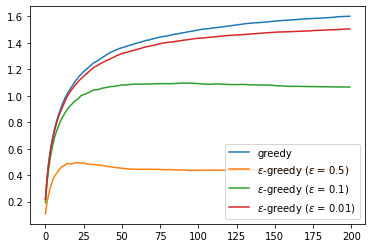

In [150]:
plt.plot(np.arange(200), avg_avg_reward_greedy[:200], label="greedy")
for i, epsilon in enumerate(epsilons):
    plt.plot(np.arange(200), avg_avg_rewards_epsilon_greedy[i][:200], label="$\epsilon$-greedy ($\epsilon$ = {})".format(epsilon))
plt.legend()

In [ ]:
# 更新するタイミングが違う気がする